# Quick EDA to figure out the data structure

Pre-load the libraries + write some misc functions

In [73]:
import sys
import numpy as np
import altair as alt
import pandas as pd
#import obspy
import os
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})
def get_cycle_data(quake_ml_root = "..", cycle_id = 7,subset = False,length = 5000,seed = 123):
    
    fname_amp = os.path.join(quake_ml_root,'data','processed',f'acoustic_data_cycle_{cycle_id}.npy')
    fname_ttf = os.path.join(quake_ml_root,'data','processed',f'time_to_failure_cycle_{cycle_id}.npy')
    
    data_amp = np.load(fname_amp)
    data_ttf = np.load(fname_ttf)
    if subset:
        np.random.seed(seed)
        ind= np.random.randint(low = 0,high = data_amp.shape[0] - length)
        print(ind)
        length = int(length)
        data_amp = data_amp[ind:(ind+length)]
        data_ttf = data_ttf[ind:(ind+length)]
    print(fname_amp)
    print(fname_ttf)
    assert data_amp.shape == data_ttf.shape, ' Shapes of ttf and amp mismatch!'
    data_amp_df = pd.DataFrame({'time':np.arange(data_amp.shape[0]),'amp':data_amp,'ttf':data_ttf})
    return data_amp_df

def get_segment(quake_ml_root = "..",subfolds = ['data','training','test','waveforms'], seg_id = "0b76f5"):
    paths = [quake_ml_root]+subfolds+[f'seg_{seg_id}']
    seg_fname = os.path.join(*paths)
    seg_fname = f'{seg_fname}.npy'
    print(seg_fname)
    data_seg = np.load(seg_fname)
    print(f'SegShape is {data_seg.shape}')
    data_seg_df = pd.DataFrame({'time':np.arange(data_seg.shape[0]),'amp':data_seg,'ttf':np.empty_like(data_seg)})
    return data_seg_df

def cut_cycle
#def produce_intervals

data_amp = get_cycle_data(subset=True,length=4e3)
data_seg = get_segment()

4967934
..\data\processed\acoustic_data_cycle_7.npy
..\data\processed\time_to_failure_cycle_7.npy
..\data\training\test\waveforms\seg_0b76f5.npy
SegShape is (150000,)


### Plot the subset of data:

...and the segment

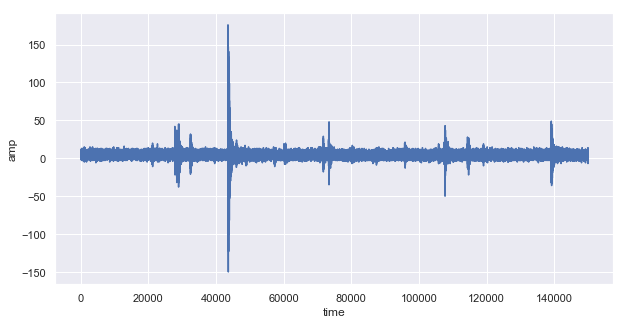

In [75]:
sns.lineplot(data =data_seg,x='time',y='amp')
